<a href="https://www.kaggle.com/code/jackhuffman5519/project-1?scriptVersionId=147869897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb 
import IPython 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-wage-comparison-for-college-vs-high-school/college_wage_premium.csv


# Questions
## 1: Analyze the overall trend in the wage gap between college graduates and high school graduates over the years.

## 2: Investigate whether the wage gap has been narrowing or widening for different genders.

## 3: Determine the year(s) when the wage gap was at its lowest and highest points.

## 4: Identify the demographic group(s) that have experienced the largest increase in wages over time.

## 5: Compare the wage gap between men and women within each educational group and analyze how it has changed over the years.

## 6: Create visualizations to visualize and compare wage trends for high school graduates and college graduates across different time periods.


In [2]:
df_dirty = pd.read_csv("/kaggle/input/usa-wage-comparison-for-college-vs-high-school/college_wage_premium.csv"
)

In [3]:
df_dirty.fillna(0, inplace = True)
df = df_dirty
df.head()

,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03


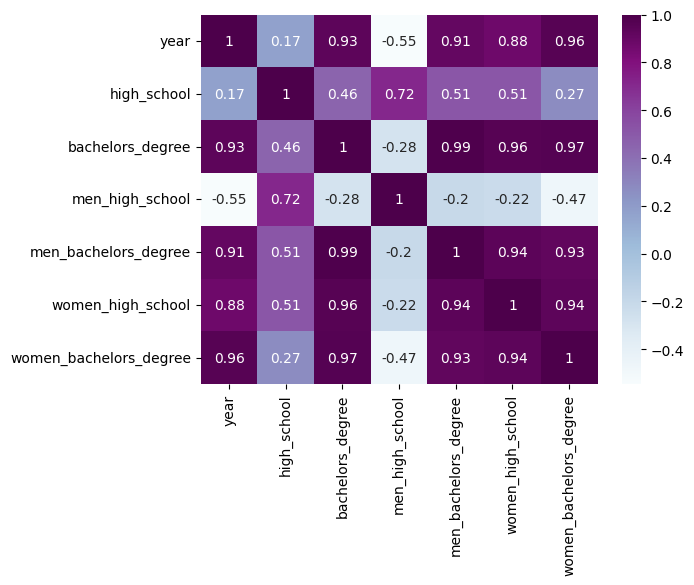

In [4]:
#Quick heatmap to see correlations
dfplot = sb.heatmap(df.corr(), cmap="BuPu", annot=True)

In [5]:
#loading parameters for plot
bachelors_sal = df['bachelors_degree']
high_sal = df['high_school']
years = df['year']
salary_difference = bachelors_sal - high_sal
df['salary_difference'] = salary_difference
display(salary_difference)

0     19.66
1     19.04
2     18.95
3     17.97
4     17.37
5     17.39
6     17.73
7     17.15
8     16.13
9     16.69
10    16.26
11    15.77
12    16.36
13    15.88
14    16.11
15    16.19
16    15.82
17    15.82
18    15.45
19    15.64
20    15.87
21    15.97
22    15.64
23    15.09
24    14.58
25    13.49
26    12.88
27    13.18
28    12.84
29    12.51
30    12.51
31    12.10
32    12.47
33    11.82
34    12.75
35    12.59
36    12.06
37    11.10
38    10.77
39    10.30
40     9.90
41     9.49
42     9.14
43     8.95
44     9.38
45     9.57
46     9.70
47     9.90
48    10.09
49    10.58
dtype: float64

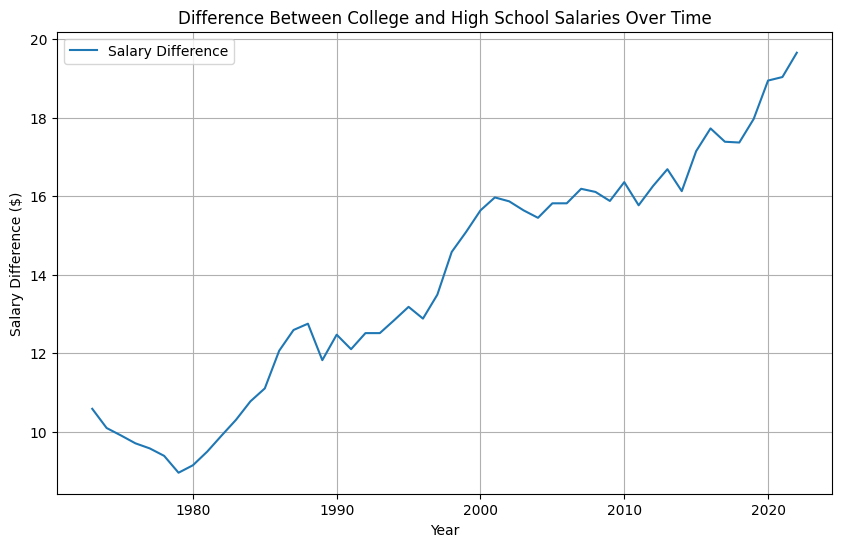

In [6]:
#General salary differences
plt.figure(figsize=(10, 6))
plt.plot(years, salary_difference, label='Salary Difference')
plt.xlabel('Year')
plt.ylabel('Salary Difference ($)')
plt.title('Difference Between College and High School Salaries Over Time')
plt.legend()
plt.grid(True)
plt.show()


**NOTE**
The overall difference between college salaries and high school salaries sky rocket and seem to not be stopping.


In [7]:
ov_summary_df = pd.DataFrame({
    'Metric': ['Minimum', 'Maximum'],
    'Salary Difference': [salary_difference.min(), salary_difference.max()],
    '(Min/Max) Year': [years[salary_difference.idxmin()], years[salary_difference.idxmax()]]
})

display(ov_summary_df)

,Metric,Salary Difference,(Min/Max) Year
0,Minimum,8.95,1979
1,Maximum,19.66,2022


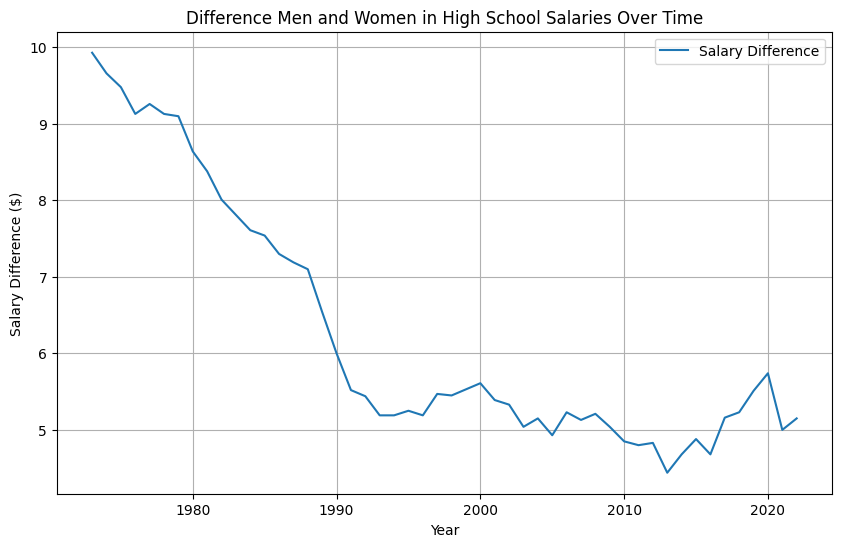

In [8]:
#Gender high school salaries differences 
high_men_sal = df['men_high_school']
high_wom_sal = df['women_high_school']
high_sal_diff = high_men_sal - high_wom_sal
df['high_sal_diff'] = high_men_sal - high_wom_sal
#note the fluctuation but over all higher gap pre 1990's

#Gender High School salary differences
plt.figure(figsize=(10, 6))
plt.plot(years, high_sal_diff, label='Salary Difference')
plt.xlabel('Year')
plt.ylabel('Salary Difference ($)')
plt.title('Difference Men and Women in High School Salaries Over Time')
plt.legend()
plt.grid(True)
plt.show()

**NOTE**
Though the difference was sizeable pre '80's the gap seems to be lowering with small increases here and there.

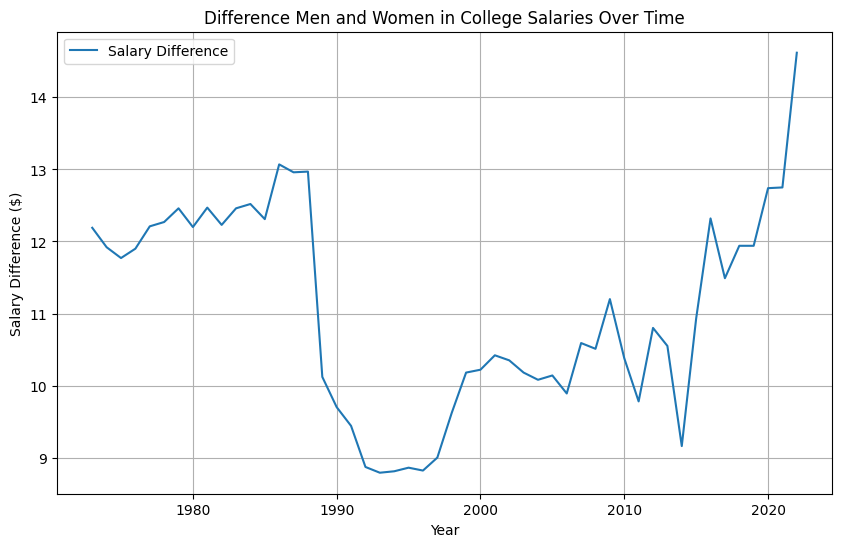

In [9]:
#Gender college salaries over time
coll_men_sal = df['men_bachelors_degree']
coll_wom_sal = df['women_bachelors_degree']
coll_sal_diff = coll_men_sal - coll_wom_sal
df['coll_sal_diff'] = coll_men_sal - coll_wom_sal

#Gender College salary differences
plt.figure(figsize=(10, 6))
plt.plot(years, coll_sal_diff, label='Salary Difference')
plt.xlabel('Year')
plt.ylabel('Salary Difference ($)')
plt.title('Difference Men and Women in College Salaries Over Time')
plt.legend()
plt.grid(True)
plt.show()

**NOTES:** 
*While the high school salary difference lowered dramatically post '90s, the college pay gap levels were all over the place.
The salaries seemed to lower after the '90s but seemed to erratically climb in proceeding years.*



In [10]:
#Finding where the gaps were at the lowest and the highest
min_sall_coll = df['coll_sal_diff'].min()
min_sall_high = df['high_sal_diff'].min()
min_year_coll = df.loc[df['coll_sal_diff'].idxmin(), 'year']
min_year_high = df.loc[df['high_sal_diff'].idxmin(), 'year']

max_sal_coll = df['coll_sal_diff'].max()
max_sal_high = df['high_sal_diff'].max()
max_year_coll = df.loc[df['coll_sal_diff'].idxmax(), 'year']
max_year_high = df.loc[df['high_sal_diff'].idxmax(), 'year']

#Display difference tables
ins_summary_df = pd.DataFrame({
    'Metric': ['Minimum', 'Maximum'],
    'College Difference': [df['coll_sal_diff'].min(), df['coll_sal_diff'].max()],
    'High School Difference': [df['high_sal_diff'].min(), df['high_sal_diff'].max()],
    '(Min/Max) Year College': [df.loc[df['coll_sal_diff'].idxmin(), 'year'], df.loc[df['coll_sal_diff'].idxmax(), 'year']],
    '(Min/Max) Year High School': [df.loc[df['high_sal_diff'].idxmin(), 'year'], df.loc[df['high_sal_diff'].idxmax(), 'year']]
})

display(ins_summary_df)

,Metric,College Difference,High School Difference,(Min/Max) Year College,(Min/Max) Year High School
0,Minimum,8.79,4.44,1993,2013
1,Maximum,14.62,9.93,2022,1973


In [11]:
ins_summary_df.to_csv('Data.csv', index=False)

**NOTE** 
Here we see that the highest and lowest years for pay gap in both college salaries and high school salaries low but still different. The College gap is almost double than the high school gap.

In [12]:
#Looking to see which demographic saw the greatest increase in wages
#First College
max_men_sal_coll = df["men_bachelors_degree"].max()
min_men_sal_coll = df["men_bachelors_degree"].min()

max_wom_sal_coll = df["women_bachelors_degree"].max()
min_wom_sal_coll = df["women_bachelors_degree"].min()

Growth_wom_coll = ((max_wom_sal_coll - min_wom_sal_coll)/min_wom_sal_coll)*100
Growth_men_coll = ((max_men_sal_coll - min_men_sal_coll)/min_men_sal_coll)*100

#Now College
max_men_sal_high = df["men_high_school"].max()
min_men_sal_high = df["men_high_school"].min()

max_wom_sal_high = df["women_high_school"].max()
min_wom_sal_high = df["women_high_school"].min()

Growth_wom_high = ((max_wom_sal_high - min_wom_sal_high) / min_wom_sal_high)*100
Growth_men_high =(( max_men_sal_high - min_men_sal_high)/min_men_sal_high)*100

growth_df = pd.DataFrame({
    
    'Men': [Growth_men_coll, Growth_men_high], 
    'Women': [Growth_wom_coll, Growth_wom_high]
    
})
growth_df['Men'] = growth_df['Men'].apply(lambda x: f'{x:.2f}%')
growth_df['Women'] = growth_df['Women'].apply(lambda x: f'{x:.2f}%')
display(growth_df)

,Men,Women
0,39.39%,54.36%
1,21.66%,17.69%


**NOTE**
This is the growth percentage by gender and education.


In [13]:

growth_df.to_csv('output_data.csv', index=False)


Coefficients: [0.20374987]
Intercept: -393.0912079700067
Mean Squared Error: 0.2752910176591428
R^2 Score: 0.9463711657864647


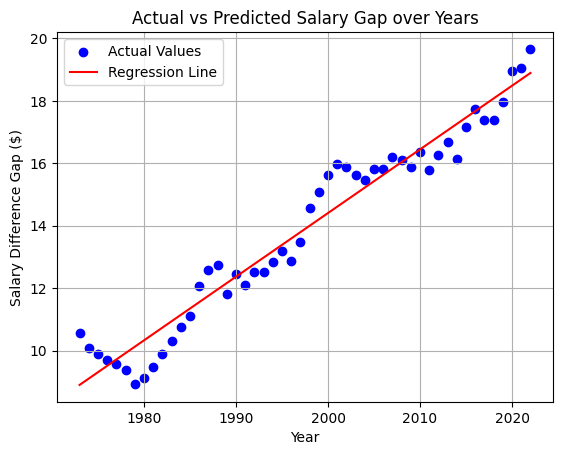

In [14]:
# Extract predictor variable and target variable
X = df[['year']]
y = df['salary_difference']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the entire dataset for plotting
y_all_pred = model.predict(X)

# Evaluate the model's performance on the test set
y_test_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score:", r2_score(y_test, y_test_pred))

# Visualization: Plotting actual vs predicted values
plt.scatter(X, y, color='blue', label='Actual Values')
plt.plot(X, y_all_pred, color='red', label='Regression Line')
plt.xlabel("Year")
plt.ylabel("Salary Difference Gap ($)")
plt.title("Actual vs Predicted Salary Gap over Years")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df.to_csv('processed_data.csv', index=False)


# Take aways
## 1: Analyze the overall trend in the wage gap between college graduates and high school graduates over the years.
    
* This analysis was carried out using plt functions. The trend reveals a widening gap between the salaries of high school and college graduates. This gap is skyrocketing and shows no signs of reversing. As of 2022, the gap was 19.66, signifying that the difference is almost 20 dollars.

## 2: Investigate whether the wage gap has been narrowing or widening for different genders.

* This investigation involved multiple steps, including analyzing the overall difference as well as the difference between genders within their respective education levels. Various plots were generated to visualize the disparities between the genders based on their educational attainment.

* The gaps overall provided insightful information. The High School gap was steadily declining. College, however, saw a decrease but shot back up exponentially in later years.
 
* In the case of High School, the gap was decreasing. However, for College, the gap was widening.


## 3: Determine the year(s) when the wage gap was at its lowest and highest points.

* I created a simple table to capture this data, both in general and for gender distinctions. The smallest wage gap occurred in 1979 at 8.95, while the largest gap was observed in 2022 at 19.66.
* Regarding gender gaps within each educational category, the smallest difference for high school was in 2013 at 4.44, and the largest was in 1979 at 9.93. 
* For college, the smallest wage gap was in 1993 at 8.79, and the largest was in 2022 at 14.62.


## 4: Identify the demographic group(s) that have experienced the largest increase in wages over time.

* This was also a straightforward table; women with college degrees experienced a wage increase of 54.36%.

## 5: Compare the wage gap between men and women within each educational group and analyze how it has changed over the years.


* As we see in the charts, the college gaps are widening every year. Though observing a downward trend in the '90s and again in the 2010s, the gap continues to rise despite the percentage increase in wages for women.
* In high school, the opposite seems to be true. The wages increase for both groups, but the trend appears to continue downward even through significant year events.


## 6: Create visualizations to visualize and compare wage trends for high school graduates and college graduates across different time periods.

* VISUALIZATIONS ARE IN THE NOTEBOOK.

# Project course
* In the course of this project, I initiated the data validation process by thoroughly examining the source and integrity of the dataset to ensure its credibility and completeness. I utilized the dropna() method to handle any missing values, ensuring a clean dataset free of null entries which could skew the analysis. To further understand the data structure and to identify any inconsistencies in data formatting or types, I inspected the DataFrame using the head() method.

* During the exploratory data analysis (EDA) phase, I conducted various visualizations and generated descriptive statistics. This step was crucial not only for understanding the distribution and relationships within the data but also for spotting any anomalies or outliers that might warrant further investigation.

* As I progressed to implementing a linear regression model, I ensured to validate the model's performance using metrics like Mean Squared Error and the R^2 Score. These metrics provided insights into the model's fit and its ability to accurately represent the underlying data trends.